# Lab 4 

# Basic Well Log Interpretation


The data used is available at this location: http://certmapper.cr.usgs.gov/data/PubArchives/OF00-200/WELLS/WALAKPA1/LAS/WA1LAS.HTM. <br>
The Walakpa1 Well is part of the USGS Open File Report 00-200 public dataset.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

data=pd.read_table('../Data/WA1.txt', delim_whitespace=True, index_col='M__DEPTH')

data=data.replace('-999.00000',np.nan)

data=data.rename(columns=({'M__DEPTH':'DEPT'}))
data['DEPT']=data.index

###  Display the logs

A triple-combo display will be created in matplotlib in order to visualize the curves.
The template will be incorporated into the <i>triple combo_plot</i> function dependent on the selection of top and bottom depths of the graph.

The triple combo display will consist in:
- First track: GR, SP, CALI (Gamma Ray, Spontaneous Potential and Caliper)
- Second track: Resistivities (Various Long and Short Spaced Resistivity Logs)
- Third Track: Density, Sonic and Neutron Porosity Log 

In the next code lines, we will set the template.

In [10]:
# Create the figure and subplots
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,25), sharey=True)
    fig.suptitle("Well Composite Log", fontsize=22)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
        
#1st track: GR, CALI, SP track
    
    ax01=ax[0].twiny()
    ax01.set_xlim(-100,10)
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel("SP [mV]")
    ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='blue')
    ax01.set_xlabel('SP[mV]',color='blue')    
    ax01.tick_params(axis='x', colors='blue')
    ax01.grid(True)
    
    ax02=ax[0].twiny()
    ax02.set_xlim(6,36)
    ax02.plot(logs.CALI, logs.DEPT, '--', label='CALN[in]', color='black') 
    ax02.spines['top'].set_position(('outward',40))
    ax02.set_xlabel('CALI[in]',color='black')    
    ax02.tick_params(axis='x', colors='black')
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.DEPT, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')
    
#2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.1,100)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[m.ohm]', color='red')
    ax11.plot(logs.ILD, logs.DEPT, label='ILD[m.ohm]', color='red')
    ax11.tick_params(axis='x', colors='red')    
    
    ax12=ax[1].twiny()
    ax12.set_xlim(0.1,100)
    ax12.set_xscale('log')
    ax12.plot(logs.ILM, logs.DEPT, label='ILM[m.ohm]', color='purple') 
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel('ILM[m.ohm]', color='purple')    
    ax12.tick_params(axis='x', colors='purple')
    
    ax13=ax[1].twiny()
    ax13.set_xlim(0.1,100)
    ax13.set_xscale('log')
    ax13.plot(logs.LL8, logs.DEPT, '--',label='LL8[m.ohm]', color='black') 
    ax13.spines['top'].set_position(('outward',0))
    ax13.set_xlabel('LL8[m.ohm]',color='black')
    ax13.tick_params(axis='x', colors='black')


#3rd track: DT, RHOB, NPHI track
    
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(140,40)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('DT[us/ft]')
    ax21.plot(logs.DT, logs.DEPT, label='DT[us/ft]', color='blue')
    ax21.set_xlabel('DT[us/ft]', color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(-15,45)
    ax22.invert_xaxis()
    ax22.plot(logs.NPHI, logs.DEPT, label='NPHI[%]', color='green') 
    ax22.spines['top'].set_position(('outward',40))
    ax22.set_xlabel('NPHI[%]', color='green')    
    ax22.tick_params(axis='x', colors='green')
    
    ax23=ax[2].twiny()
    ax23.set_xlim(1.95,2.95)
    ax23.plot(logs.RHOB, logs.DEPT ,label='RHOB[g/cc]', color='red') 
    ax23.spines['top'].set_position(('outward',80))
    ax23.set_xlabel('RHOB[g/cc]',color='red')
    ax23.tick_params(axis='x', colors='red')

## Q1. Interpretation of Well Logs

The Pebble Shale and Walakpa Sandstone have not been interpreted. Define the top depth of the Pebble Shale and the Top of the Walakpa SS

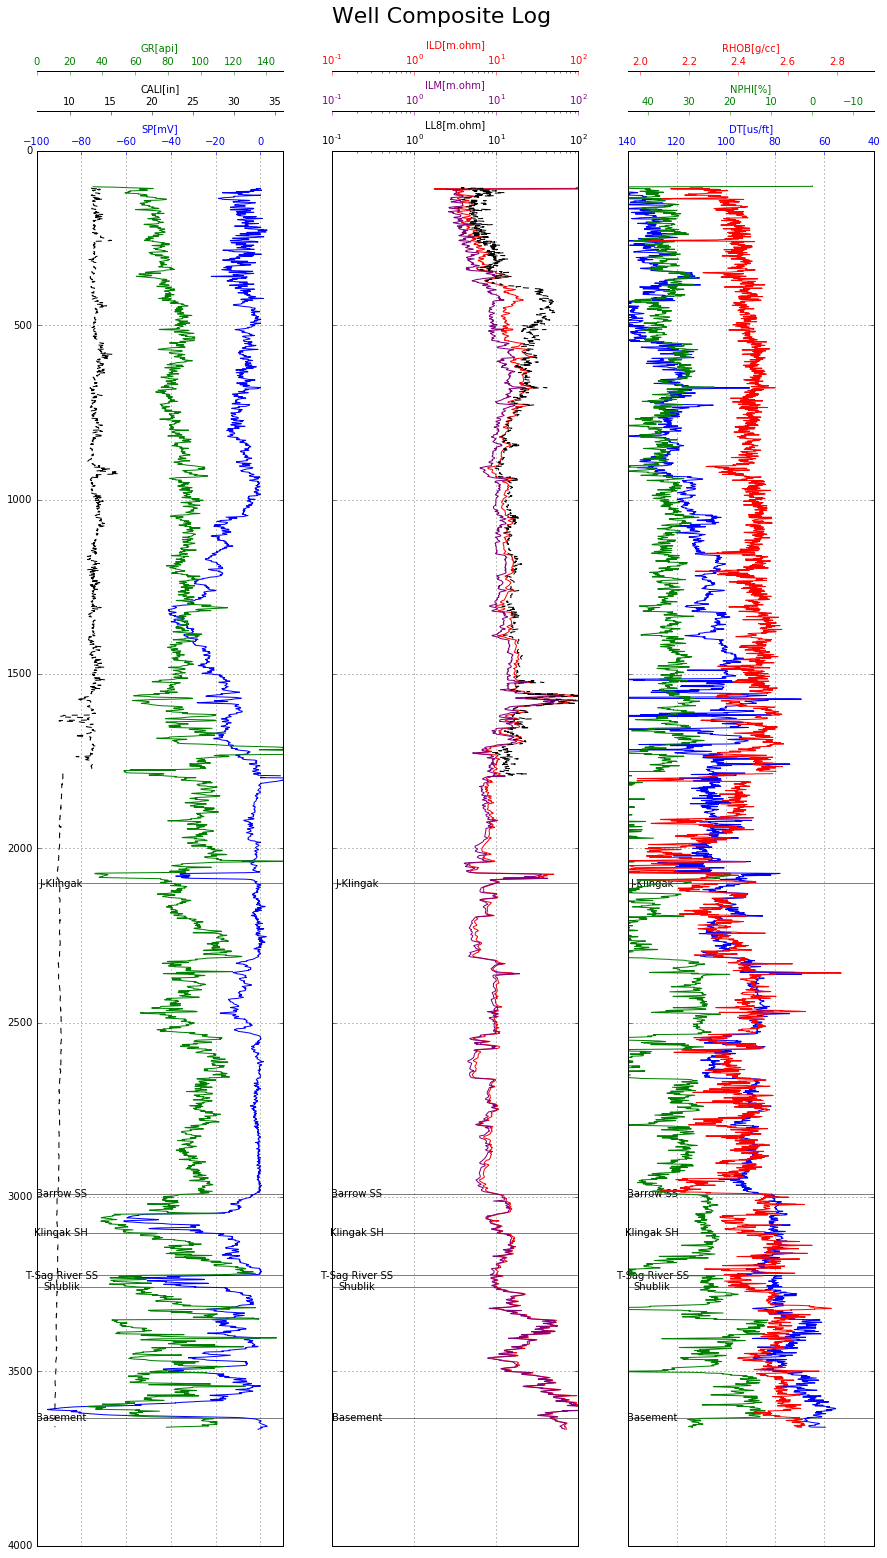

In [11]:
tops = ('Pebble SH','Walakpa SS', 'J-Klingak','Barrow SS','Klingak SH','T-Sag River SS', 'Shublik','Basement')
tops_depths=(0,0,2100,2990, 3102,3224,3258,3633)

triple_combo_plot(data.DEPT.min(),data.DEPT.max())

## Question 2 - Petrophysics on a Zone
A ZONE for analysis will be selected from the entire log. Let's display again the logs within the choosen interval with triple_combo_plot function.

We are interested in the Barrow Sandstone interval

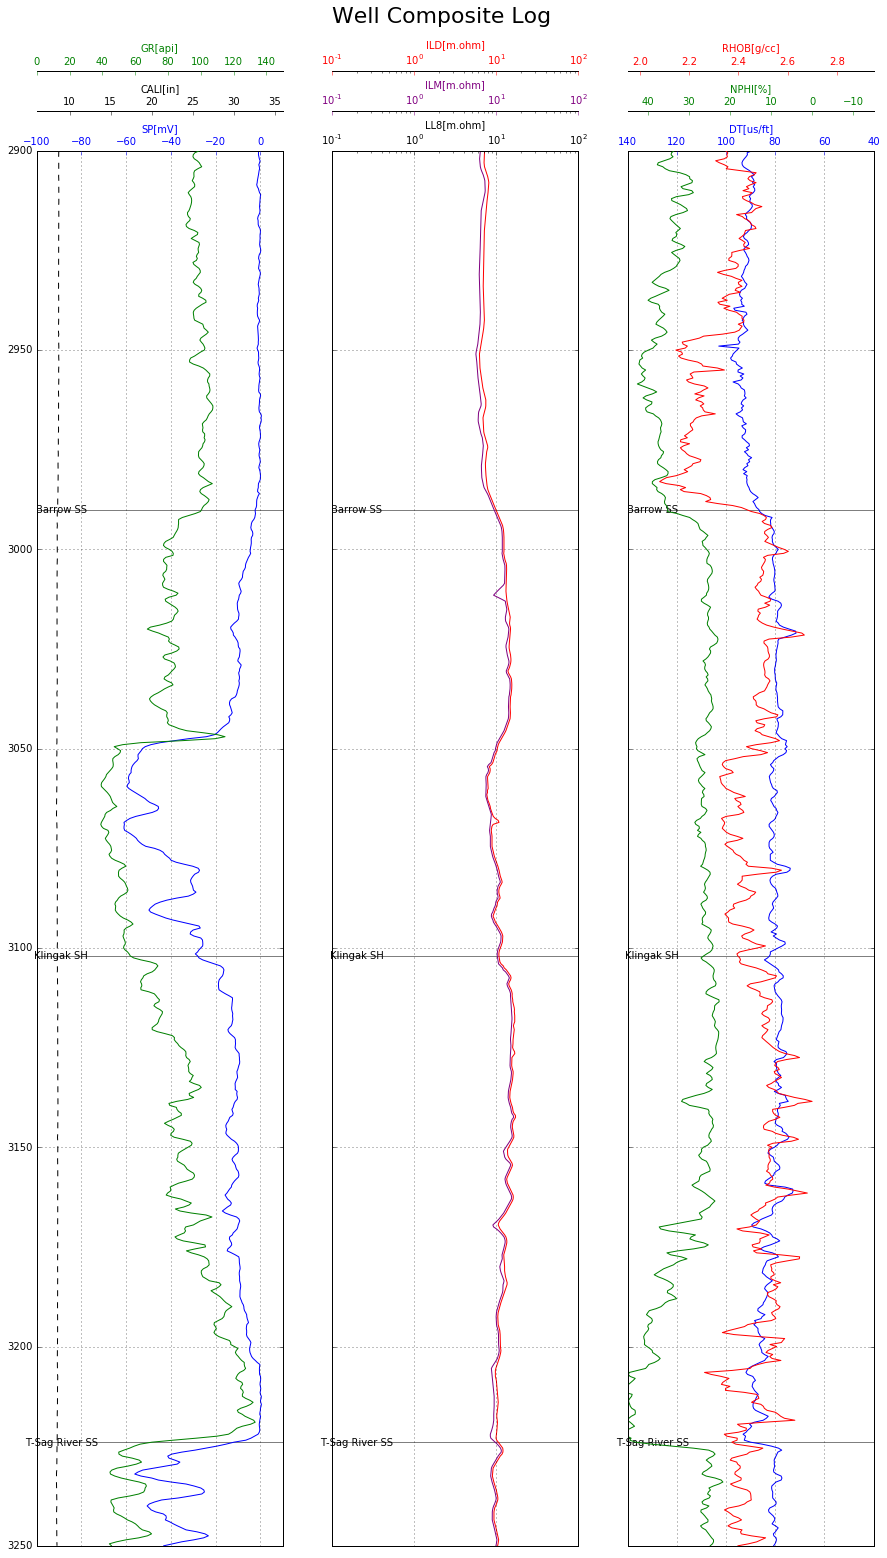

In [12]:
## Set the zone of analysis here
top_depth= 2900
bottom_depth=3250
triple_combo_plot(top_depth,bottom_depth)

## Q3 - Calculate Volume of Clay


The first step of a basic well log analysis will begin with the volume of clay calculation.

There are several methods used to perform that, from Gamma Ray Log, Spontaneous Potential and from Resistivity Logs


In [13]:
#Volume of Clay from Gamma Ray Log
def vclgr(gr_log, gr_clean, gr_clay, correction=None):

    igr=(gr_log-gr_clean)/(gr_clay-gr_clean)       #Linear Gamma Ray
    vclgr_larionov_young=0.083*(2**(3.7*igr)-1)   #Larionov (1969) - Tertiary rocks
    vclgr_larionov_old=0.33*(2**(2*igr)-1)        #Larionov (1969) - Older rocks
    vclgr_clavier=1.7-(3.38-(igr+0.7)**2)**0.5    #Clavier (1971)
    vclgr_steiber=0.5*igr/(1.5-igr)               #Steiber (1969) - Tertiary rocks

    if correction == "young":
        vclgr=vclgr_larionov_young
    elif correction == "older":
        vclgr=vclgr_larionov_old
    elif correction=="clavier":
        vclgr=vclgr_clavier
    elif correction=="steiber":
        vclgr=vclgr_steiber
    else:
        vclgr=igr
    return vclgr

#Volume of Clay from SP Log
def vclsp(sp_log, sp_clean, sp_clay):
    vclsp=(sp_log-sp_clean)/(sp_clay-sp_clean)
    return vclsp

#Volume of Clay from Resistivity Log
def vclrt(rt_log, rt_clean,rt_clay):
    vrt=(rt_clay/rt_log)*(rt_clean-rt_log)/(rt_clean-rt_clay)
    if (rt_log > 2* rt_clay):
        vclrt = 0.5 * (2 * vrt)** (0.67*(vrt+1)) 
    else:
        vclrt = vrt
    return vclrt

#Volume of clay from neutron density log
def vclnd(neut_log,den_log,neut_clean1,den_clean1,neut_clean2,den_clean2,neut_clay,den_clay):
    term1 = (den_clean2-den_clean1)*(neut_log-neut_clean1)-(den_log-den_clean1)*(neut_clean2-neut_clean1)
    term2 =(den_clean2-den_clean1)*(neut_clay-neut_clean1)-(den_clay-den_clean1)*(neut_clean2-neut_clean1)
    vclnd=term1/term2
    return vclnd

# Input parameters 
logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]

gr_clean, gr_clay = 40, 135
sp_clean, sp_clay = -60,2

neut_clean1, den_clean1 = 15, 2.6
neut_clean2, den_clean2 = 40, 2
neut_clay, den_clay =47.5, 2.8

#calculate the VCL functions, by looping with pandas series values through VCL functions defined above
# without looping - the function will throw an error
vclgr_temp,vclnd_temp, vclrt_temp, vclsp_temp =[],[],[],[]

for (i,j,k,l,m) in zip(logs.GR,logs.NPHI,logs.RHOB,logs.ILD,logs.SP):
    vclgr_temp.append(vclgr(i, gr_clean, gr_clay))
    vclnd_temp.append(vclnd(j,k,neut_clean1,den_clean1,neut_clean2,den_clean2,neut_clay,den_clay))
    vclsp_temp.append(vclsp(m, sp_clean, sp_clay))
    
logs.is_copy = False # without will throw an exception

logs['VCLGR']=vclgr_temp
logs['VCLND']=vclnd_temp
logs['VCLSP']=vclsp_temp
del vclgr_temp, vclnd_temp, vclsp_temp         #remove the arrays to free mem


Now we are going to compare the Volume of Clay between the methods..
        

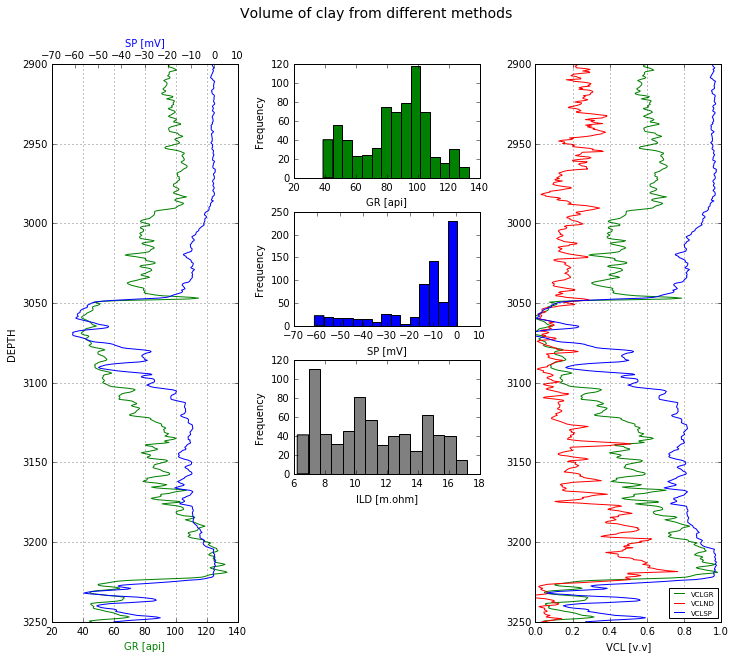

In [14]:
from matplotlib import gridspec

#logs=data.iloc[[top_depth],[bottom_depth]]
#logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
#print (logs.GR,logs.LLD)
#Setting GRAPH ELEMENTS

fig = plt.figure(figsize=(12,10))
fig.suptitle('Volume of clay from different methods',fontsize=14)
fig.subplots_adjust(top=0.90,wspace=0.3, hspace =0.3)

gs = gridspec.GridSpec(4, 3)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[:,2],sharey = ax1)

# Graph for GR,SP

ax1.invert_yaxis()
ax1.grid(True)
ax1.set_ylabel('DEPTH')
ax1.plot(logs.GR, logs.DEPT, color='green')
ax1.set_xlabel('GR [api]', color='green')

ax11=ax1.twiny()
ax11.plot(logs.SP, logs.DEPT, color='blue')
ax11.set_xlabel("SP [mV]",color='blue')


#The graph of GR histogram
ax2.hist(logs.GR.dropna(),bins=15,color='green')
ax2.set_xlabel('GR [api]')
ax2.set_ylabel('Frequency')

ax3.hist(logs.SP.dropna(),bins=15, color='blue')
ax3.set_xlabel('SP [mV]')
ax3.set_ylabel('Frequency')

ax4.hist(logs.ILD.dropna(),bins=15, color='gray')
ax4.set_xlabel('ILD [m.ohm]')
ax4.set_ylabel('Frequency')


#plt.title("Volume of Clay")

ax6.plot(logs.VCLGR, logs.DEPT, label ='VCLGR',color="green")
ax6.plot(logs.VCLND, logs.DEPT,label ='VCLND',color="red")
ax6.plot(logs.VCLSP, logs.DEPT,label ='VCLSP',color="blue")
ax6.legend(loc='best',fontsize='x-small')
ax6.set_xlim(0,1)
ax6.set_ylim(top_depth,bottom_depth)
ax6.invert_yaxis()
ax6.grid(True)
ax6.set_xlabel('VCL [v.v]')
logs['VCL']=logs['VCLGR']

## Q4. The Porosity:
 
Three logs are available for porosity estimation: sonic, density and neutronic. Porosity can be evaluated by single or dual combinations of any three types mentioned: neutron-density, neutron-sonic and sonic-density.

The NEUTRON-DENSITY combinations give the best result in any type of lithology.

In [24]:
#Willie-TimeAverage
def phis_shale(dt_sh, dt_ma, dt_fl):
    phis_shale = (dt_sh-dt_ma)/(dt_fl-dt_ma)
    return phis_shale
def phis_w(dt_log, dt_ma, dt_fl, cp):
    phis_w=(1/cp)*(dt_log-dt_ma)/(dt_fl-dt_ma)
    return phis_w
def phis_w_sh_corr(dt_log, dt_ma, dt_fl, cp, dt_sh, vcl):
    phis_w=(1/cp)*(dt_log-dt_ma)/(dt_fl-dt_ma)
    phis_w_sh = (dt_sh-dt_ma)/(dt_fl-dt_ma)
    phis_w_sh_corr = phis_w - vcl * phis_w_sh
    return phis_w_sh_corr

#Raymer-Hunt-Gardner (the alpha(5/8) ranges from 0.625-0.70, 0.67-most, 0.60-gas reservoirs)
def phis_rhg(dt_log, dt_ma, alpha):
    phis_rhg=(alpha)*(dt_log-dt_ma)/(dt_log)
    return phis_rhg
def phis_rhg_sh_corr(dt_log, dt_ma, dt_sh, vcl):
    phis_rhg=(5/8)*(dt_log-dt_ma)/(dt_log)
    phis_rhg_sh = (dt_sh-dt_ma)/(dt_fl-dt_ma)
    phis_rhg_sh_corr = phis_rhg - vcl * phis_rhg_sh
    return phis_rhg_sh_corr

#Density
def phid(den_log, den_ma, den_fl, den_sh, vcl):
    phid = (den_log - den_ma) / (den_fl - den_ma)
    return phid
def phid_shale(den_sh, den_ma, den_fl):
    phid_shale = (den_sh - den_ma) / (den_fl - den_ma)
    return phid_shale
def phid_sh_corr(den, den_ma, den_fl, den_sh, vcl):
    phid = (den - den_ma) / (den_fl - den_ma)
    phid_sh = (den_sh - den_ma) / (den_fl - den_ma)
    phid_sh_corr = phid - vcl * phid_sh
    return phid_sh_corr

# NEUTRON:
def phin_sh_corr(neut, neut_sh, vcl):
    phin_sh_corr = (neut-vcl*neut_sh)/100
    return phin_sh_corr

#Neutron-Density
def phixnd(phinshc, phidshc):
    phixnd= (phinshc + phidshc) / 2
    return phixnd
def phixnd_gas_corr(phin, phid, phin_sh, phid_sh):
    phixnd_gas_corr= ((phin**2+phin**2)/2)**(0.5)    #for gas intervals (nphi<dphi = crossover)
    return phixnd_gas_corr


#Matrix, fluid and appropiate shales values must be declared in the next variables:
dt_ma, dt_fl, dt_sh, cp, alpha = 55.5,188.0,90.0,1,5/8
den_ma, den_fl, den_sh = 2.65, 1.1, 2.4

phis_sh=phis_shale(dt_sh, dt_ma, dt_fl)
phid_sh=phis_shale(den_sh, den_ma, den_fl)
phin_sh=45

#calculate the VCL functions, by looping with pandas series values through VCL functions defined above

logs['PHISw']=phis_w(logs.DT, dt_ma, dt_fl, cp)
logs['PHISwshc']=phis_w_sh_corr(logs.DT, dt_ma, dt_fl, cp, dt_sh, logs.VCL).clip(0,1)

logs['PHISrhg']=phis_rhg(logs.DT, dt_ma, alpha)
logs['PHISrhgshc']=phis_rhg_sh_corr(logs.DT, dt_ma, dt_sh, logs.VCL).clip(0,1)

logs['PHID']=phid(logs.RHOB, den_ma, den_fl, den_sh, logs.VCL)
logs['PHIDshc']=phid_sh_corr(logs.RHOB, den_ma, den_fl, den_sh, logs.VCL).clip(0,1)

logs['PHIN']=logs.NPHI/100
logs['PHINshc']=phin_sh_corr(logs.NPHI, phin_sh, logs.VCL).clip(0,1)

logs['PHIxND']=phixnd(logs.PHINshc,logs.PHIDshc).clip(0,1)


logs['PHIE']=logs['PHIxND']

In [29]:
## challenge... can you plot the porosity derived from the different methods?

## 5. Water Saturation
Before calculating the water saturation of the formation will need a value for the Rw (Resistivity of water)

##### Resistivity of water 
It can be determined from:
 - water catalogs
 - DST test water analysis

If we have no idea we use Archie's equation:

##### Archie Water Saturation Eq.

Sw^n = (a * Rw) / (Rt * PHI ^ m)

We need to define first the variables: a, m, n. You can start with this pair(a=1,m=2,n=2) as it works well in most of lithologies. If your matrix is shaly-mixed, the you can decrease the m to 1.8.



In [30]:
a=2 #turtuosity factor
m=1 #cementation factor
n=3 #saturation exponent

In [31]:
def sw_archie(Rw, Rt, Poro, a, m, n):
        F = a / (Poro**m)
        Sw_archie = (F * Rw/Rt)**(1/n)
        return Sw_archie

In [36]:
#Rw =rwa
#logs['SWa']=(sw_archie(Rw,logs.ILD,logs.PHIE,a,m,n)).clip(0,1)
#logs['BVW']=logs['SWa']*logs['PHIE']
#logs['matrix']=1-logs.VCL-logs.PHIE

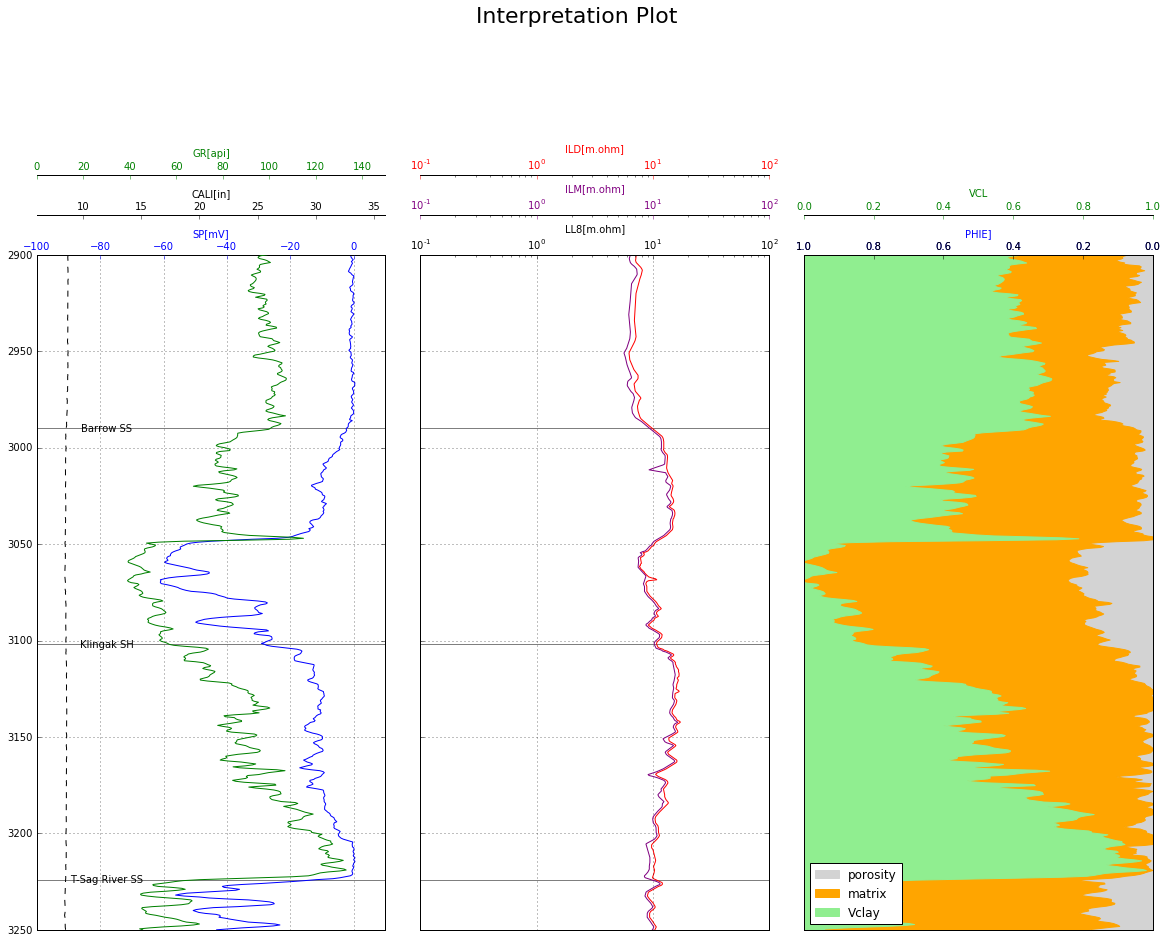

In [37]:
import matplotlib.pyplot as plt
# Create the figure and subplots

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,15), sharey=True)
fig.suptitle("Interpretation Plot", fontsize=22)
fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
for axes in ax:
    axes.set_ylim (top_depth,bottom_depth)
    axes.invert_yaxis()
    axes.yaxis.grid(True)
    axes.get_xaxis().set_visible(False)
    for i in tops_depths:
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
for (i,j) in zip(tops_depths,tops):
    if ((i>=top_depth) and (i<=bottom_depth)):
        ax[0].text(0.2, i ,j, horizontalalignment='center',verticalalignment='center')                
    
#1st track: GR, SP, CALI track
ax01=ax[0].twiny()
ax01.set_xlim(-100,10)
ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='blue')
ax01.set_xlabel('SP[mV]',color='blue')    
ax01.tick_params(axis='x', colors='blue')
    
ax02=ax[0].twiny()
ax02.set_xlim(6,36)
ax01.grid(True)
ax02.plot(logs.CALI, logs.DEPT, '--', label='CALI[in]', color='black') 
ax02.spines['top'].set_position(('outward',40))
ax02.set_xlabel('CALI[in]',color='black')    
ax02.tick_params(axis='x', colors='black')
    
ax03=ax[0].twiny()
ax03.set_xlim(0,150)
ax03.plot(logs.GR, logs.DEPT, label='GR[api]', color='green') 
ax03.spines['top'].set_position(('outward',80))
ax03.set_xlabel('GR[api]',color='green')    
ax03.tick_params(axis='x', colors='green')

#2nd track: Resistivities
ax11=ax[1].twiny()
ax11.set_xlim(0.1,100)
ax11.set_xscale('log')
ax11.grid(True)
ax11.spines['top'].set_position(('outward',80))
ax11.set_xlabel('ILD[m.ohm]', color='red')
ax11.plot(logs.ILD, logs.DEPT, label='ILD[m.ohm]', color='red')
ax11.tick_params(axis='x', colors='red')    

ax12=ax[1].twiny()
ax12.set_xlim(0.1,100)
ax12.set_xscale('log')
ax12.plot(logs.ILM, logs.DEPT, label='ILM[m.ohm]', color='purple') 
ax12.spines['top'].set_position(('outward',40))
ax12.set_xlabel('ILM[m.ohm]', color='purple')    
ax12.tick_params(axis='x', colors='purple')
    
ax13=ax[1].twiny()
ax13.set_xlim(0.1,100)
ax13.set_xscale('log')
ax13.plot(logs.LL8, logs.DEPT, '--',label='LL8[m.ohm]', color='black') 
ax13.spines['top'].set_position(('outward',0))
ax13.set_xlabel('LL8[m.ohm]',color='black')
ax13.tick_params(axis='x', colors='black')

#6th track: PHIE, MATRIX, VCL

ax20=ax[2].twiny()
ax20.set_xlim(1,0)
ax20.spines['top'].set_position(('outward',0))
ax20.plot(logs.PHIE, logs.DEPT, label='PHIE', color='black',linewidth=0.5)
ax20.set_xlabel('PHIE]', color='blue')    
ax20.tick_params(axis='x', colors='blue')

ax21=ax[2].twiny()
ax21.set_xlim(0,1)
ax21.spines['top'].set_position(('outward',40))
ax21.plot(logs.VCL, logs.DEPT, label='VCL', color='green',linewidth=0.5)
ax21.set_xlabel('VCL', color='green')    
ax21.tick_params(axis='x', colors='green')

ax22=ax[2].twiny()
ax22.set_xlim(1,0)
ax22.spines['top'].set_position(('outward',0))
ax22.fill_betweenx(logs.DEPT,0,logs.PHIE,color='lightgray',label='porosity')
ax22.fill_betweenx(logs.DEPT,logs.PHIE,1-logs.VCL,color='orange',label='matrix')
ax22.fill_betweenx(logs.DEPT,1-logs.VCL,1,color='lightgreen',label= 'Vclay')
ax22.legend(loc='lower left')
